# Defining your own custom loaders

In [1]:
from rich import print

import cellpy
from cellpy.utils import example_data, plotutils

In [2]:
# Comment out this when running the notebook locally to get interactive plots
import plotly.io as pio
pio.renderers.default = "png"

Defining a simple utility-function to get a peek of the file in question:

In [3]:
def head(f, n=5):
    print(f" {f.name} ".center(80, "="))
    with open(f) as datafile:
        if n > 1:
            for j in range(n):
                line = datafile.readline()
                print(f"[{j+1:02}] {line.rstrip()}")
        else:
            for j, line in enumerate(datafile.readlines()):
                print(f"[{j+1:02}] {line.rstrip()}")
    print(f" {f.name} ".center(80, "="))

## Using the "custom" instrument

This loader can be used if you have simple but unusual files. It needs an instrument file containing a description of the structure of the data file.
You can load files in csv, xlsx, and xls format using this loader.

Here is an example of a custom data file and a corresponding instrument file (yaml format).

In [4]:
p_csv = example_data.custom_file_path()
instrument_file = example_data.custom_instrument_path()

In [5]:
head(p_csv, 30)

=============================== custom_data.csv ================================

[01] # PRIME INSTRUMENT FILE --- M12X---!! HEAD !!---M13B---;;;;;;;;;

[02] number of headers ;19;;;;;;;;

[03] operator;Jan Petter Maehlen;;;;;;;;

[04] date;01.01.2016;;;;;;;;

[05] instrument;bobby;;;;;;;;

[06] schedule;galvanic;;;;;;;;

[07] cell;ee002;;;;;;;;

[08] geometry;half-cell;;;;;;;;

[09] counter;Li-metal;;;;;;;;

[10] material;si-based;;;;;;;;

[11] mass;0.0012;;;;;;;;

[12] # PRIME INSTRUMENT FILE ---L01---''LOG'' ---0000000-;;;;;;;;;

[13] 15;Started collecting auxilary data (saved to output.log);;;;;;;;

[14] 773;Problem encountered - reloading config;;;;;;;;

[15] 1111;R12;;;;;;;;

[16] 6588;R12;;;;;;;;

[17] 7712;Problem encountered - reloading config;;;;;;;;

[18] 78999;R0;;;;;;;;

[19] # PRIME INSTRUMENT FILE ---268876-;;;;;;;;;

[20] index;test_time;step_time;date_stamp;step;cycle;current;voltage;charge_capacity;discharge_Capacity

[21] 0;120.00;120.00;43374.42;1;1;0.00;1.14;0.00;0.00

[22] 1;240.00;240.00;43374.42;1;1;0.00;1.14;0.00;0.00

[23] 2;360.00;360.00;43374.42;1;1;0.00;1.14;0.00;0.00

[24] 3;480.00;480.00;43374.42;1;1;0.00;1.14;0.00;0.00

[25] 4;600.01;600.01;43374.42;1;1;0.00;1.14;0.00;0.00

[26] 5;720.01;720.01;43374.42;1;1;0.00;1.14;0.00;0.00

[27] 6;840.01;840.01;43374.42;1;1;0.00;1.14;0.00;0.00

[28] 7;960.01;960.01;43374.43;1;1;0.00;1.14;0.00;0.00

[29] 8;1080.01;1080.01;43374.43;1;1;0.00;1.14;0.00;0.00

[30] 9;1200.01;1200.01;43374.43;1;1;0.00;1.14;0.00;0.00

=============================== custom_data.csv ================================

In [6]:
head(instrument_file, -1)

============================ custom_instrument.yml =============================

[01] ---

[02] formatters:

[03]     skiprows: 19

[04]     sep: ";"

[05]     header: 0

[06]     encoding: ISO-8859-1  # options: ISO-8859-1 utf-8 cp1252

[07]     decimal: .

[08]     thousands:

[09]     comment_chars:

[10]         - '#'

[11]         - '!'

[12] post_processors:

[13]     split_capacity: false

[14]     split_current: false

[15]     set_index: false

[16]     rename_headers: true

[17]     set_cycle_number_not_zero: false

[18]     convert_date_time_to_datetime: true

[19]     convert_step_time_to_timedelta: false

[20]     convert_test_time_to_timedelta: false

[21] normal_headers_renaming_dict:

[22]     data_point_txt: "index"

[23]     datetime_txt: "date_stamp"

[24]     test_time_txt: "test_time"

[25]     step_time_txt: "step_time"

[26]     cycle_index_txt: "cycle"

[27]     step_index_txt: "step"

[28]     current_txt: "current"

[29]     voltage_txt: "voltage"

[30]     charge_capacity_txt: "charge_capacity"

[31]     discharge_capacity_txt: "discharge_Capacity"

[32] unit_labels:

[33]     resistance: Ohms

[34]     time: s

[35]     current: mA

[36]     voltage: V

[37]     power: W

[38]     capacity: mAh

[39]     energy: Wh

[40]     temperature: C

[41] raw_units:

[42]     current: A

[43]     charge: Ah

[44]     mass: mg

[45]     time: s

[46] raw_limits:

[47]     current_hard: 1.0e-13

[48]     current_soft: 1.0e-05

[49]     ir_change: 1.0e-05

[50]     stable_charge_hard: 0.9

[51]     stable_charge_soft: 5.0

[52]     stable_current_hard: 2.0

[53]     stable_current_soft: 4.0

[54]     stable_voltage_hard: 2.0

[55]     stable_voltage_soft: 4.0

============================ custom_instrument.yml =============================

In [7]:
c = cellpy.get(p_csv, instrument="custom", instrument_file=instrument_file)

(cellpy) - self.sep=';', self.skiprows=19, self.header=0, self.encoding='ISO-8859-1', self.decimal='.'
(cellpy) - running post-processor: rename_headers
Index(['index', 'test_time', 'step_time', 'date_stamp', 'step', 'cycle',
       'current', 'voltage', 'charge_capacity', 'discharge_Capacity'],
      dtype='object')
(cellpy) - running post-processor: convert_date_time_to_datetime


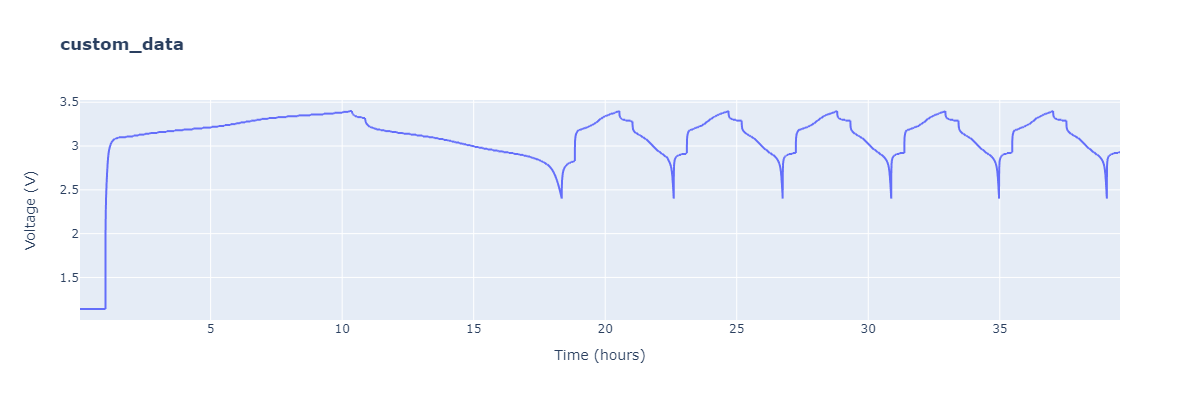

In [8]:
plotutils.raw_plot(c, width=1200, height=400)

## Using the "local_instrument" loader

This loader is used for loading data using the corresponding local yaml file with definitions on how the data should be loaded. This loader
is based on the ``TxtLoader`` and can only be used to load csv-type files.
As a "short-cut", this loader will be used if you set the ``instrument`` to the name of the instrument file (with the ``.yml`` extension) e.g.
``c = cellpy.get(rawfile, instrument="instrumentfile.yml")``.
The default instrument file is defined in your cellpy configuration file:
```
Instruments:
  custom_instrument_definitions_file: my_local_instrument.yml
```

As an example, let us see how we could load one of the example Maccor files using a local instrument definition file instead of the implemented "maccor_txt" loader.

In [9]:
p = example_data.maccor_file_path()
print(f"{p.name=}")

p.name='maccor_three.txt'

In [10]:
local_instrument = example_data.local_instrument_path()
print(f"{local_instrument.name=}")

local_instrument.name='local_instrument.yml'

In [11]:
head(local_instrument, -1)

============================= local_instrument.yml =============================

[01] ---

[02] formatters:

[03]     skiprows: 2

[04]     sep: "\t"

[05]     header: 0

[06]     encoding: ISO-8859-1

[07]     decimal: .

[08]     thousands:

[09]     comment_chars:

[10]         - '#'

[11]         - '!'

[12] pre_processors:

[13]     remove_empty_lines: true

[14] post_processors:

[15]     split_capacity: true

[16]     split_current: true

[17]     set_index: true

[18]     rename_headers: true

[19]     set_cycle_number_not_zero: true

[20]     remove_last_if_bad: true

[21]     convert_date_time_to_datetime: true

[22]     convert_step_time_to_timedelta: true

[23]     convert_test_time_to_timedelta: true

[24] normal_headers_renaming_dict:

[25]     data_point_txt: "Rec#"

[26]     datetime_txt: "DPt Time"

[27]     test_time_txt: "TestTime"

[28]     step_time_txt: "StepTime"

[29]     cycle_index_txt: "Cyc#"

[30]     step_index_txt: "Step"

[31]     current_txt: "mAmps"

[32]     voltage_txt: "Volts"

[33] #    power_txt: "Watt-hr"

[34]     charge_capacity_txt: "mAmp-hr"

[35]     charge_energy_txt: "mWatt-hr"

[36] #    ac_impedance_txt: "ACImp/Ohms"

[37] #    internal_resistance_txt: "DCIR/Ohms"

[38] unit_labels:

[39]     resistance: Ohms

[40]     time: s

[41]     current: mA

[42]     voltage: mV

[43]     power: mW

[44]     capacity: mAh

[45]     energy: mWh

[46]     temperature: C

[47] states:

[48]     column_name: State

[49]     charge_keys:

[50]         - C

[51]     discharge_keys:

[52]         - D

[53]     rest_keys:

[54]         - R

[55] raw_units:

[56]     current: "mA"

[57]     charge: "mAh"

[58]     mass: "g"

[59]     voltage: "mV"

[60] raw_limits:

[61]     current_hard: 1.0e-13

[62]     current_soft: 1.0e-05

[63]     ir_change: 1.0e-05

[64]     stable_charge_hard: 0.9

[65]     stable_charge_soft: 5.0

[66]     stable_current_hard: 2.0

[67]     stable_current_soft: 4.0

[68]     stable_voltage_hard: 2.0

[69]     stable_voltage_soft: 4.0

============================= local_instrument.yml =============================

In [12]:
head(p, 20)

=============================== maccor_three.txt ===============================

[01] Today''s Date      03/28/2022 12:50:27 PM

[02]

[03] Date of Test:      08/23/2021 6:04:18 PM

[04]

[05] Rec#       Cyc#    Step    TestTime        StepTime        mAmp-hr mWatt-hr        mAmps   Volts   State   ES 
DPt Time        Unnamed: 12

[06] 1  0       1         0d 00:00:00.00          0d 00:00:00.00        0.0     0.0     0.0     1853.8186       R  
0       08/23/2021 6:04:18 PM

[07] 2  0       1         0d 00:01:00.00          0d 00:01:00.00        0.0     0.0     0.0     1853.0556       R  
1       08/23/2021 6:05:18 PM

[08] 3  0       1         0d 00:02:00.00          0d 00:02:00.00        0.0     0.0     0.0     1853.0556       R  
1       08/23/2021 6:06:18 PM

[09] 4  0       1         0d 00:03:00.00          0d 00:03:00.00        0.0     0.0     0.0     1853.2082       R  
1       08/23/2021 6:07:18 PM

[10] 5  0       1         0d 00:04:00.00          0d 00:04:00.00        0.0     0.0     0.0     1853.0556       R  
1       08/23/2021 6:08:18 PM

[11] 6  0       1         0d 00:05:00.00          0d 00:05:00.00        0.0     0.0     0.0     1853.0556       R  
1       08/23/2021 6:09:18 PM

[12] 7  0       1         0d 00:06:00.00          0d 00:06:00.00        0.0     0.0     0.0     1853.2082       R  
1       08/23/2021 6:10:18 PM

[13] 8  0       1         0d 00:07:00.00          0d 00:07:00.00        0.0     0.0     0.0     1853.2082       R  
1       08/23/2021 6:11:18 PM

[14] 9  0       1         0d 00:08:00.00          0d 00:08:00.00        0.0     0.0     0.0     1852.903        R  
1       08/23/2021 6:12:18 PM

[15] 10 0       1         0d 00:09:00.00          0d 00:09:00.00        0.0     0.0     0.0     1853.2082       R  
1       08/23/2021 6:13:18 PM

[16] 11 0       1         0d 00:10:00.00          0d 00:10:00.00        0.0     0.0     0.0     1853.0556       R  
1       08/23/2021 6:14:18 PM

[17] 12 0       1         0d 00:11:00.00          0d 00:11:00.00        0.0     0.0     0.0     1853.2082       R  
1       08/23/2021 6:15:18 PM

[18] 13 0       1         0d 00:12:00.00          0d 00:12:00.00        0.0     0.0     0.0     1853.0556       R  
1       08/23/2021 6:16:18 PM

[19] 14 0       1         0d 00:13:00.00          0d 00:13:00.00        0.0     0.0     0.0     1853.2082       R  
1       08/23/2021 6:17:18 PM

[20] 15 0       1         0d 00:14:00.00          0d 00:14:00.00        0.0     0.0     0.0     1853.3608       R  
1       08/23/2021 6:18:18 PM

=============================== maccor_three.txt ===============================

In [13]:
from cellpy import log

c = cellpy.get(p, instrument=local_instrument)

(cellpy) - running pre-processor: remove_empty_lines
(cellpy) - self.sep='\t', self.skiprows=2, self.header=0, self.encoding='ISO-8859-1', self.decimal='.'
(cellpy) - running post-processor: rename_headers
Index(['Rec#', 'Cyc#', 'Step', 'TestTime', 'StepTime', 'mAmp-hr', 'mWatt-hr',
       'mAmps', 'Volts', 'State', 'ES', 'DPt Time', 'Unnamed: 12'],
      dtype='object')
(cellpy) - running post-processor: remove_last_if_bad
(cellpy) - running post-processor: split_capacity
(cellpy) - running post-processor: split_current
(cellpy) - running post-processor: set_index
(cellpy) - running post-processor: set_cycle_number_not_zero
(cellpy) - running post-processor: convert_date_time_to_datetime
(cellpy) - running post-processor: convert_step_time_to_timedelta
(cellpy) - running post-processor: convert_test_time_to_timedelta


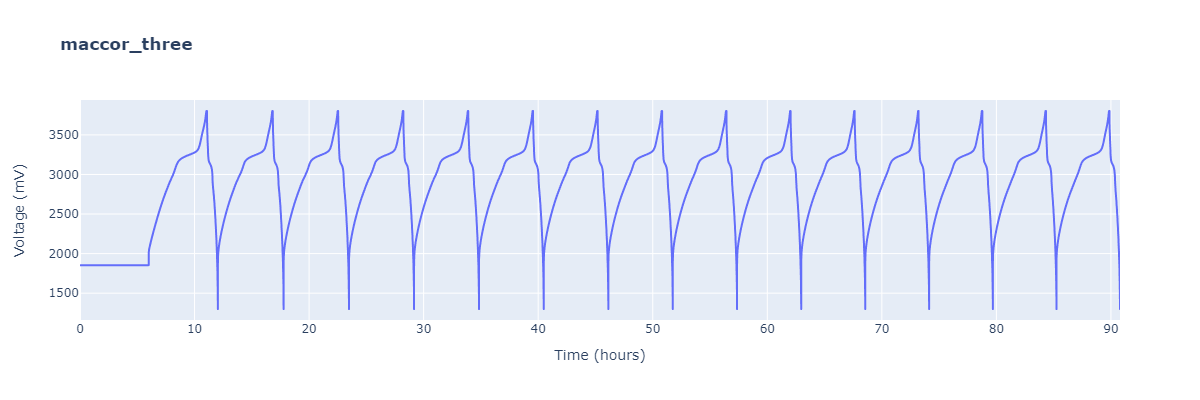

In [14]:
plotutils.raw_plot(c, width=1200, height=400)

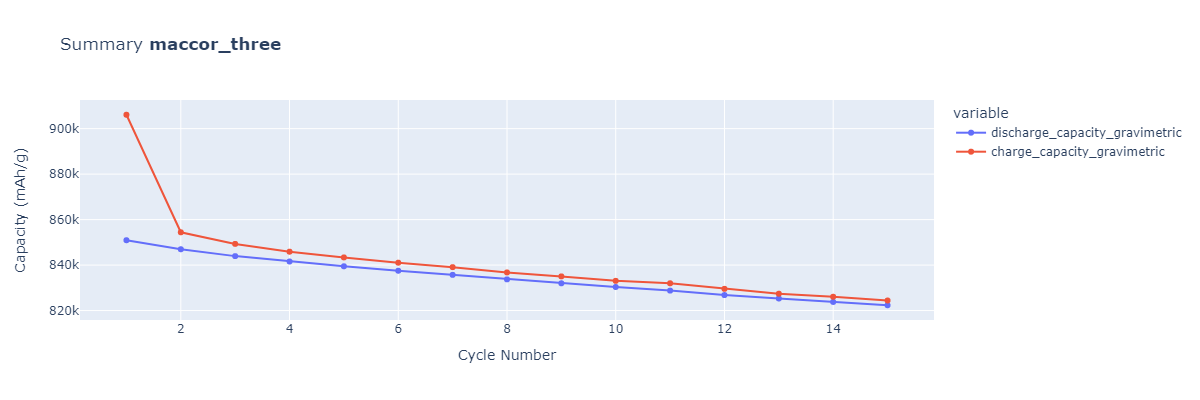

In [15]:
plotutils.summary_plot(c, width=1200, height=400)